## Sales Analysis

Dune is a reputable retailers offering a diverse selection of products including accessories, clothings and phones. With a growing presence in 14 Countries and a team of over 70,000 employees, the company prides itself on providing affordable options for everyone. 

I have been tasked with analyzing and summarizing the company's data in order to gain actionable insights and understand the underlying patterns and relationships.

This analysis will help identify areas of opportunities and inform future business decisions aimed at improving and increasing profitability.

In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
import collections as Counter

In [ ]:
#Load Dataset
df = pd.read_csv("/content/Dune Sales Data.csv")

In [ ]:
#Printing the top rows
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [ ]:
#Printing the bottom rows
df.tail()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Printing Dimensionality
df.shape

(34867, 12)

In [ ]:
#Examining the data features
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [ ]:
#Investigating the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [ ]:
#Numerical Statistical Analysis
df.describe()

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34867.000000,34866.000000,34866.000000,34866.000000
mean,36.382683,2.002524,349.880567,389.232473
std,11.112813,0.813936,490.015846,525.319097
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [ ]:
#Categorical Statistical Analysis
df.describe(include=['object','bool'])


,Date,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option
count,34866,34866,34866,34866,34866,34866,34866,34866
unique,576,4,7,2,36,3,17,3
top,1-Mar-16,Low,Remota,F,Lagos,Accessories,Keyboard,Cash
freq,196,13041,6667,17439,10332,22534,11112,15911


In [ ]:
#Investigate for missing data
null_vals = df.isnull().sum()
null_vals

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

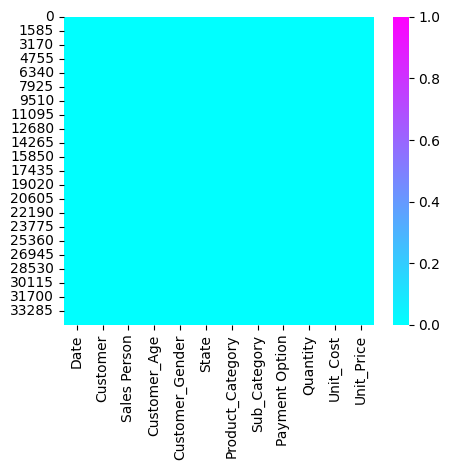

In [ ]:
#Vizualising missing data
plt.figure(figsize = (5,4))
sb.heatmap(df.isnull(), cbar= True, cmap="cool");


In [ ]:
#Display where the missing data exist

In [ ]:
df[df.isnull().any(axis=1)]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Removing the missing data
df.dropna(inplace=True)

In [ ]:
#Converting the Date column into Datetime object
df["Date"]= pd.to_datetime(df["Date"])


In [ ]:
#Extracting the Year, Month and Quater
df['year'] = df['Date'].dt.year
df['month'] = df["Date"].dt.month
df['Month_name'] = df['Date'].dt.month_name()
df['Quater'] = df['Date'].dt.quarter

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,Month_name,Quater
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1


In [ ]:
#Group Customer Age
def age_group(x):
  if x <= 31:
    return '<= 31 Young Adults'
  elif x <= 46:
    return '32-46 Adults'
  elif x <= 61:
    return '47-61 Old Adults'
  elif x <= 76:
    return '<= 62-76 Elderly'
  else:
    return '>=77 Aged'

#Applying the Age function to the data
df["Age_group"] = df["Customer_Age"].apply(age_group)
df.head(2)


,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,Month_name,Quater,Age_group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,<= 31 Young Adults
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,<= 31 Young Adults


In [ ]:
#Cost, Revenue and Profit Calculations
df['Cost'] = df['Quantity']*df['Unit_Cost']
df['Revenue'] = df['Quantity']*df['Unit_Price']
df['Profit'] = df['Revenue']-df['Cost']

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,Month_name,Quater,Age_group,Cost,Revenue,Profit
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,<= 31 Young Adults,80.0,109.0,29.0
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,<= 31 Young Adults,49.0,57.0,8.0


In [ ]:
# Prit/Loss Grouping
def porl(x):
  if x >= 0:
    return 'profit'
  else:
    return 'loss'

df["Profit_label"] = df['Profit'].apply(porl)
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,Month_name,Quater,Age_group,Cost,Revenue,Profit,Profit_label
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.0,2016,2,February,1,<= 31 Young Adults,80.0,109.0,29.0,profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.5,2016,2,February,1,<= 31 Young Adults,49.0,57.0,8.0,profit


#### Univariate Analysis

In [ ]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'Month_name',
       'Quater', 'Age_group', 'Cost', 'Revenue', 'Profit', 'Profit_label'],
      dtype='object')

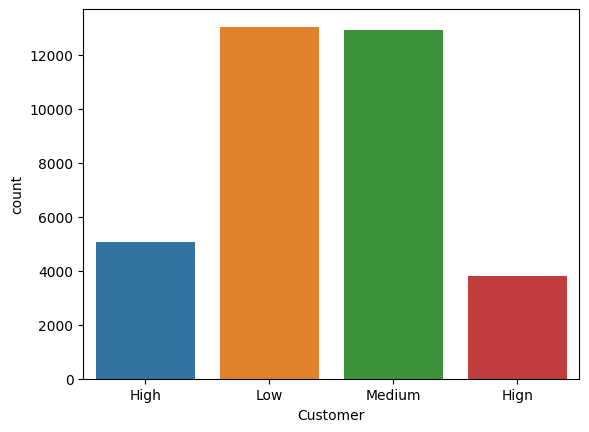

In [ ]:
# Visualising our Customer 
sb.countplot(x='Customer', data= df);

In [ ]:
#Investigating the rows affected by wrong Customer description
df[df["Customer"] == "Hign"].head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,Month_name,Quater,Age_group,Cost,Revenue,Profit,Profit_label
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,...,2136.00,2015,8,August,3,<= 31 Young Adults,2295.00,2136.00,-159.0,loss
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,...,19.50,2015,8,August,3,<= 31 Young Adults,35.00,39.00,4.0,profit
29772,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,18.67,2015,8,August,3,<= 31 Young Adults,50.01,56.01,6.0,profit


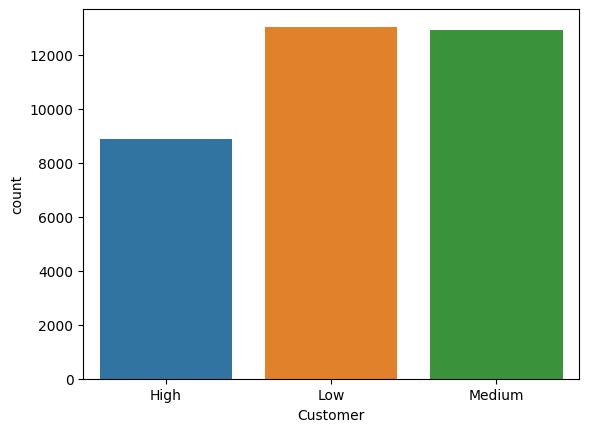

In [ ]:
#Correcting the Wrong Spelling of HIGN
df.loc[df["Customer"] == "Hign", "Customer"] = "High"

sb.countplot(x='Customer', data= df);

In [ ]:
df["Customer"].value_counts()

Low       13041
Medium    12926
High       8899
Name: Customer, dtype: int64

Looking at the chart, we can see that majority of the transactions was made by low Customers.

In [ ]:
#Sales Persons Analysis
ax = sb.countplot(x="Sales Person", order=df["Sales Person"].value_counts(ascending=False).index)